# Logistic Regression with Sklearn

We use sigmoid function to convert (-infinity, +infinity) --> [0,1] <br>
__Sigmoid Function__ : g(x) = 1/(1+e^-x)  which gives the probability of x belonging to class 1.  (There are 2 classes i.e., 0 & 1)

__Lets take class 0 as +ve and class 1 as -ve class.__ <br>
If __d < 0__ then it belongs to left class i.e., __class 0__ [0, 0.5] <br>
If __d > 0__ then it belongs to right class i.e., __class 1__ [0.5, 1] <br>
[ check it by putting x = d in sigmoid function ]

P(y=1 / x,theta) = h(x) <br>
P(y=0 / x,theta) = 1 - h(x) <br>                                where, h is hypothesis means probabilty <br>
=> P(y / x, theta) = [h(x)]^ya * [1 - h(x)]^(1-ya) <br>       where, ya -> y actual 

__Goal:__ Find such a line for which probability for all points should be maximum.

Likelihood: _L = product [ ([yi]^ya * [1 - yi]^(1-ya) ] from i = 1 to n_   where, yi is y_predicted  <br>
but this become a very large calculation. So we take log of this

LL(theta) = sum ( ya* log([h(x)]) + (1-ya)*log( [1 - h(x)]) ) from i = 1 to n <br>

we have to maximize this using gradient descent (-ve) or gradient ascent (+ve).

###### Summing up gradient over all examples for each feature.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X, y = make_blobs(n_samples=1000,  centers=2, random_state=42)

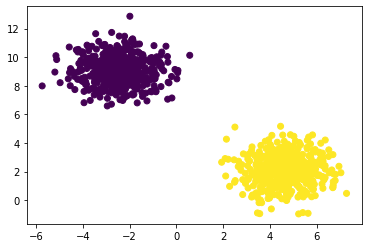

In [13]:
plt.scatter(X[:,0], X[:,1], c = y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [17]:
model.coef_, model.intercept_

(array([[ 1.26415035, -1.21172442]]), array([5.49040014]))

In [18]:
x1_sample = np.linspace(-6, 7)

In [19]:
colors = ["red", "blue"]
y_colors = list(map(lambda c: colors[c], y))

In [21]:
y_colors[:10]

['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red']

In [22]:
y[:10]

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [23]:
len(y_colors), len(y)

(1000, 1000)

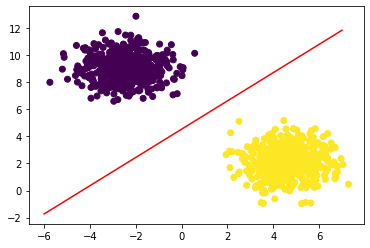

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y)

for i, (coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
    x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
    plt.plot(x1_sample, x2_sample, color=colors[i])

In [25]:
model.score(X_test,y_test)

1.0